# <span style="color:#C8102E"> Table of Contents </span>
* [1. Description of Dataset](#description_1)
* [2. Modifying the Dataset](#modification_2)
* [3. Summary of Analysis](#analysis_3)
* [4. Visualizing the Data](#visualization_4)

# <span style="color:#002B54"> 1. Description of Dataset</span> <a class="anchor" id="description_1"></a>

We will be using the data provided by Center for Transportation Analysis Oak Ridge National Laboratory for various analysis on a state level. 

fr_orig = foreign origin<br>
dms_orig - domestic origin<br>
dms_dest = domestic destination<br>
fr_dest = foreign destination<br>
fr_inmode = mode of transportation used for import<br>
dms_mode = mode of transportation used from domestic origin to domestic destination<br>
fr_outmode = mode of transportation used for export<br>
sctg2 = type of commodity<br>
trade_type = domestic, import, export<br>

We will be analyzing only the freight tons and value. This data consists of actual values until 2015 and the rest are forecasted values.

# <span style="color:#002B54"> 2. Modifying the Dataset</span> <a class="anchor" id="modification_2"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Freight_Data.csv')
df

,fr_orig,dms_orig,dms_dest,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,tons_2012,...,tmiles_2015,tmiles_2020,tmiles_2025,tmiles_2030,tmiles_2035,tmiles_2040,tmiles_2045,curval_2013,curval_2014,curval_2015
0,NaN,1,1,NaN,NaN,1,NaN,1,1,3084.7678,...,204.8564,230.8865,254.3870,277.7117,305.7184,336.1778,351.9228,4273.0414,5156.8149,4713.9220
1,NaN,1,12,NaN,NaN,1,NaN,1,1,10.5060,...,4.4557,4.2213,4.0848,3.9862,3.8644,4.0277,4.3933,21.0003,23.9063,21.2444
2,NaN,1,13,NaN,NaN,1,NaN,1,1,97.4125,...,27.3168,26.4331,26.7289,27.8136,28.6019,28.5799,31.2815,147.2225,149.8771,131.5474
3,NaN,1,20,NaN,NaN,1,NaN,1,1,40.1150,...,29.6268,29.7992,28.4390,26.7350,24.9841,23.8533,25.2513,115.0118,101.3772,88.1043
4,NaN,1,22,NaN,NaN,1,NaN,1,1,23.3480,...,4.5342,4.5391,4.5167,4.5650,4.6830,4.7934,5.1410,34.9698,44.8126,40.8650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550316,NaN,19,19,NaN,NaN,1,NaN,99,1,434.9570,...,81.1594,89.1497,96.8185,105.3107,115.9355,128.0963,128.0963,149.0820,153.9079,155.1780
550317,NaN,29,29,NaN,NaN,1,NaN,99,1,6.9643,...,1.6753,1.7875,1.9015,2.0351,2.1896,2.3619,2.3619,0.8971,0.9274,0.9443
550318,NaN,38,27,NaN,NaN,2,NaN,99,1,1.8502,...,0.7266,0.7506,0.8254,0.9152,1.0086,1.1071,1.1071,14.2580,15.0212,14.5689
550319,NaN,40,40,NaN,NaN,2,NaN,99,1,128.0160,...,20.8532,22.9607,24.4977,26.3205,28.7312,31.6447,31.6447,37.7572,39.5779,39.0224


In [3]:
# we will only be focusing on tons and value for this project so let's begin by dropping the tmiles and curval data
df.drop(['tmiles_2012', 'tmiles_2013', 'tmiles_2014', 'tmiles_2015', 'tmiles_2020', 'tmiles_2025', 'tmiles_2030', 'tmiles_2035', 'tmiles_2040', 'tmiles_2045', 'curval_2013', 'curval_2014', 'curval_2015'], axis=1, inplace=True)

In [4]:
# Now let's replace the state code values to state names and foreign codes to foreign region names
state_dict = { 2: 'ALASKA', 28: 'MISSISSIPPI',
1: 'ALABAMA', 30: 'MONTANA',
5: 'ARKANSAS', 37: 'NORTH CAROLINA',
60: 'AMERICAN SAMOA', 38: 'NORTH DAKOTA',
4: 'ARIZONA', 31: 'NEBRASKA',
6: 'CALIFORNIA', 33: 'NEW HAMPSHIRE',
8: 'COLORADO', 34: 'NEW JERSEY',
9: 'CONNECTICUT', 35: 'NEW MEXICO',
11: 'DISTRICT OF COLUMBIA', 32: 'NEVADA',
10: 'DELAWARE', 36: 'NEW YORK',
12: 'FLORIDA', 39: 'OHIO',
13: 'GEORGIA', 40: 'OKLAHOMA',
66: 'GUAM', 41: 'OREGON',
15: 'HAWAII', 42: 'PENNSYLVANIA',
19: 'IOWA', 72: 'PUERTO RICO',
16: 'IDAHO', 44: 'RHODE ISLAND',
17: 'ILLINOIS', 45: 'SOUTH CAROLINA',
18: 'INDIANA', 46: 'SOUTH DAKOTA',
20: 'KANSAS', 47: 'TENNESSEE',
21: 'KENTUCKY', 48: 'TEXAS',
22: 'LOUISIANA', 49: 'UTAH',
25: 'MASSACHUSETTS', 51: 'VIRGINIA',
24: 'MARYLAND', 78: 'VIRGIN ISLANDS',
23: 'MAINE', 50: 'VERMONT',
26: 'MICHIGAN', 53: 'WASHINGTON',
27: 'MINNESOTA', 55: 'WISCONSIN',
29: 'MISSOURI', 54: 'WEST VIRGINIA',
56: 'WYOMING'
}

foreign_dict = {
801: 'Canada',
802: 'Mexico',
803: 'Rest of Americas',
804: 'Europe',
805: 'Africa',
806: 'SW & Central Asia',
807: 'Eastern Asia',
808: 'SE Asia & Oceania'
}

df['fr_orig'] = df['fr_orig'].map(foreign_dict) 
df['dms_orig'] = df['dms_orig'].map(state_dict) 
df['dms_dest'] = df['dms_dest'].map(state_dict) 
df['fr_dest'] = df['fr_dest'].map(foreign_dict) 
df

,fr_orig,dms_orig,dms_dest,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,tons_2012,...,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045
0,NaN,ALABAMA,ALABAMA,NaN,NaN,1,NaN,1,1,3084.7678,...,3985.7224,4030.0225,4172.4029,4283.6271,4774.0998,5195.6013,5601.5463,6076.4217,6610.5853,6940.5180
1,NaN,ALABAMA,FLORIDA,NaN,NaN,1,NaN,1,1,10.5060,...,24.9644,19.8059,19.3427,19.3052,18.5296,18.1629,17.9025,17.4768,18.3471,20.1160
2,NaN,ALABAMA,GEORGIA,NaN,NaN,1,NaN,1,1,97.4125,...,131.7440,138.8496,121.2663,119.5395,115.7620,117.1696,122.0364,125.6106,125.5996,137.5069
3,NaN,ALABAMA,KANSAS,NaN,NaN,1,NaN,1,1,40.1150,...,98.6330,108.4708,82.0248,80.0620,80.5279,76.8522,72.2475,67.5160,64.4599,68.2378
4,NaN,ALABAMA,LOUISIANA,NaN,NaN,1,NaN,1,1,23.3480,...,30.8948,32.9809,36.2581,37.1348,37.8658,38.3576,39.3263,40.8262,42.1013,45.3356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550316,NaN,IOWA,IOWA,NaN,NaN,1,NaN,99,1,434.9570,...,144.8980,147.6458,151.1127,152.0590,167.0294,181.3977,197.3084,217.2149,239.9993,239.9993
550317,NaN,MISSOURI,MISSOURI,NaN,NaN,1,NaN,99,1,6.9643,...,0.8999,0.8885,0.9106,0.9253,0.9873,1.0502,1.1240,1.2093,1.3045,1.3045
550318,NaN,NORTH DAKOTA,MINNESOTA,NaN,NaN,2,NaN,99,1,1.8502,...,14.5160,14.1206,14.7484,14.2761,14.7470,16.2175,17.9823,19.8163,21.7521,21.7521
550319,NaN,OKLAHOMA,OKLAHOMA,NaN,NaN,2,NaN,99,1,128.0160,...,35.4810,37.3935,38.8591,38.2381,42.1028,44.9210,48.2636,52.6840,58.0264,58.0264


In [5]:
commodities_dict = {
1: 'Animals and Fish (live)',
2: 'Cereal Grains (includes seed)',
3: 'Agricultural Products (excludes Animal Feed, Cereal Grains, and Forage Products)',
4: 'Animal Feed, Eggs, Honey, and Other Products of Animal Origin',
5: 'Meat, Poultry, Fish, Seafood, and Their Preparations',
6: 'Milled Grain Products and Preparations, and Bakery Products',
7: 'Other Prepared Foodstuffs, Fats and Oils',
8: 'Alcoholic Beverages and Denatured Alcohol',
9: 'Tobacco Products',
10: 'Monumental or Building Stone',
11: 'Natural Sands',
12: 'Gravel and Crushed Stone (excludes Dolomite and Slate)',
13: 'Other Non-Metallic Minerals not elsewhere classified',
14: 'Metallic Ores and Concentrates',
15: 'Coal',
16: 'Crude Petroleum',
17: 'Gasoline, Aviation Turbine Fuel, and Ethanol (includes Kerosene, and Fuel Alcohols)',
18: 'Fuel Oils (includes Diesel, Bunker C, and Biodiesel)',
19: 'Other Coal and Petroleum Products, not elsewhere classified',
20: 'Basic Chemicals',
21: 'Pharmaceutical Products',
22: 'Fertilizers',
23: 'Other Chemical Products and Preparations',
24: 'Plastics and Rubber',
25: 'Logs and Other Wood in the Rough',
26: 'Wood Products',
27: 'Pulp, Newsprint, Paper, and Paperboard',
28: 'Paper or Paperboard Articles',
29: 'Printed Products',
30: 'Textiles, Leather, and Articles of Textiles or Leather',
31: 'Non-Metallic Mineral Products',
32: 'Base Metal in Primary or Semi-Finished Forms and in Finished Basic Shapes',
33: 'Articles of Base Metal',
34: 'Machinery',
35: 'Electronic and Other Electrical Equipment and Components, and Office Equipment',
36: 'Motorized and Other Vehicles (includes parts)',
37: 'Transportation Equipment, not elsewhere classified',
38: 'Precision Instruments and Apparatus',
39: 'Furniture, Mattresses and Mattress Supports, Lamps, Lighting Fittings, and Illuminated Signs',
40: 'Miscellaneous Manufactured Products',
41: 'Waste and Scrap (excludes of agriculture or food, see 041xx)',
43: 'Mixed Freight',
99: 'Commodity unknown'
}

# <span style="color:#002B54"> 3. Summary of Analysis </span> <a class="anchor" id="analysis_3"></a>

In [6]:
# which state imports/exports the most amount of cargo
# From which country we import the most/ which country we export to the most
# which commodity is imported/exported the most
# which state produces most amount of commodities and which state consumes most amount of commodities
# top commodities consumed and top commodities produced
# top foreign countries we import from and export to

In [7]:
# Since 2015 is the latest realtime data we pulled out the top 10 states that imported goods arrive at
df_import = df[df['trade_type']==2]
top_import_quantity_states = df_import.groupby('dms_orig').tons_2015.sum(numeric_only=True).sort_values(ascending=False)

# We can notice that Minnesota and North Dakota rank much higher in terms of tons of import but the
# commodities arriving are not that valuable
top_import_value_states = df_import.groupby('dms_orig').value_2015.sum(numeric_only=True).sort_values(ascending=False)[0:10]

# We can notice that 1: machinary, 2: Electronic and Other Electrical Equipment and Components, and Office Equipment,
# 3: Textiles, Leather, and Articles of Textiles or Leather, 4: Plastics and Rubber, 5: Articles of Base Metal 
# are the top 5 imported commodities
top_imported_commodities = df_import.groupby('sctg2').tons_2015.sum().sort_values(ascending=False).iloc[0:5]
top_imported_commodities.index = top_imported_commodities.index.map(commodities_dict)

In [8]:
# Since 2015 is the latest realtime data we pulled out the top 10 states that exported goods leave from
df_export = df[df['trade_type']==3]
top_export_quantity_statesd = df_export.groupby('dms_dest').tons_2015.sum(numeric_only=True).sort_values(ascending=False)[0:10]

top_export_value_states = df_export.groupby('dms_dest').value_2015.sum(numeric_only=True).sort_values(ascending=False)[0:10]

# We can notice that 1: Machinary, 2: Electronic and Other Electrical Equipment and Components, and Office Equipment ,
# 3: Precision Instruments and Apparatus, 4: Plastics and Rubber, 5: Articles of Base Metal
# are the top commodities exported ?
top_exported_commodities = df_export.groupby('sctg2').tons_2015.sum().sort_values(ascending=False).iloc[0:5]
top_exported_commodities.index = top_exported_commodities.index.map(commodities_dict)

In [9]:
# We are filtering out domestic and export data as that will give us the amount produced in a particular state for 
# dms_origin, if we would have included import data that would include state of entry of the import goods which were
# actually manufactured in a foreign region
df_produce = df[(df['trade_type'] == 1) | (df['trade_type']==3)]
top_production_quantity_states = df_produce.groupby('dms_orig').tons_2015.sum().sort_values(ascending = False).iloc[0:10]

top_production_value_states = df_produce.groupby('dms_orig').value_2015.sum().sort_values(ascending = False).iloc[0:10]

top_produced_commodities = df_produce.groupby('sctg2').tons_2015.sum().sort_values(ascending=False).iloc[0:10]
top_produced_commodities.index = top_produced_commodities.index.map(commodities_dict)

In [10]:
# We are filtering out domestic and import data as that will give us the amount consumed in a particular state for 
# dms_dest, if we would have included export data that would include state of exit of the export goods which were
# actually consumed in a foreign region
df_consume = df[(df['trade_type'] == 1) | (df['trade_type']==2)]
top_consumption_quantity_states = df_consume.groupby('dms_dest').tons_2015.sum().sort_values(ascending = False).iloc[0:10]

top_consumption_value_states = df_consume.groupby('dms_dest').value_2015.sum().sort_values(ascending = False).iloc[0:10]

top_consumed_commodities = df_consume.groupby('sctg2').tons_2015.sum().sort_values(ascending=False).iloc[0:10]
top_consumed_commodities.index = top_consumed_commodities.index.map(commodities_dict)

In [11]:
top_foreign_import__quantity_regions = df_import.groupby('fr_orig').tons_2015.sum().sort_values(ascending=False).sort_index()

top_foreign_import__value_regions = df_import.groupby('fr_orig').value_2015.sum().sort_values(ascending=False).sort_index()

In [12]:
top_foreign_export_quantity_regions = df_export.groupby('fr_dest').tons_2015.sum().sort_values(ascending=False).sort_index()

top_foreign_export_value_regions = df_export.groupby('fr_dest').value_2015.sum().sort_values(ascending=False).sort_index()

In [13]:
# How much percent has the trade increased from 2012 to 2015 (Note: is load travels from new jersey to virginia but passes
# from delaware and maryland the same load is counted NJ-DE, DE-MD, MD-VA 3 times)

(df.tons_2015.sum() - df.tons_2012.sum())/df.tons_2015.sum() * 100

# transportation of goods saw about a 6% increase in 3 years

5.905798192762241

# <span style="color:#002B54"> 4. Visualizing the Data</span> <a class="anchor" id="visualization_4"></a>

## <span style="color:#075895"> Import Export Data</span>

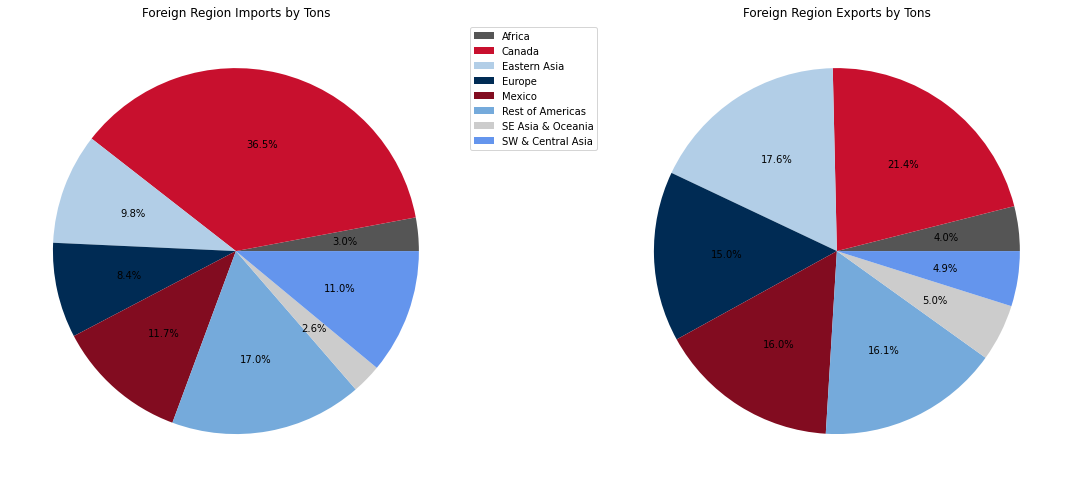

In [14]:
color = ['#555555', '#C8102E', '#B2CEE7', '#002B54', '#820C20', '#75AADB', '#CCCCCC', '#6495ED']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(top_foreign_import__quantity_regions, autopct='%1.1f%%', colors=color)
ax1.set_title('Foreign Region Imports by Tons')
ax2.pie(top_foreign_export_quantity_regions, autopct='%1.1f%%', colors=color)
ax2.set_title('Foreign Region Exports by Tons')
f.set_figheight(10)
f.set_figwidth(15)
ax1.legend(top_foreign_import__quantity_regions.index, bbox_to_anchor=(1,1))
plt.tight_layout()

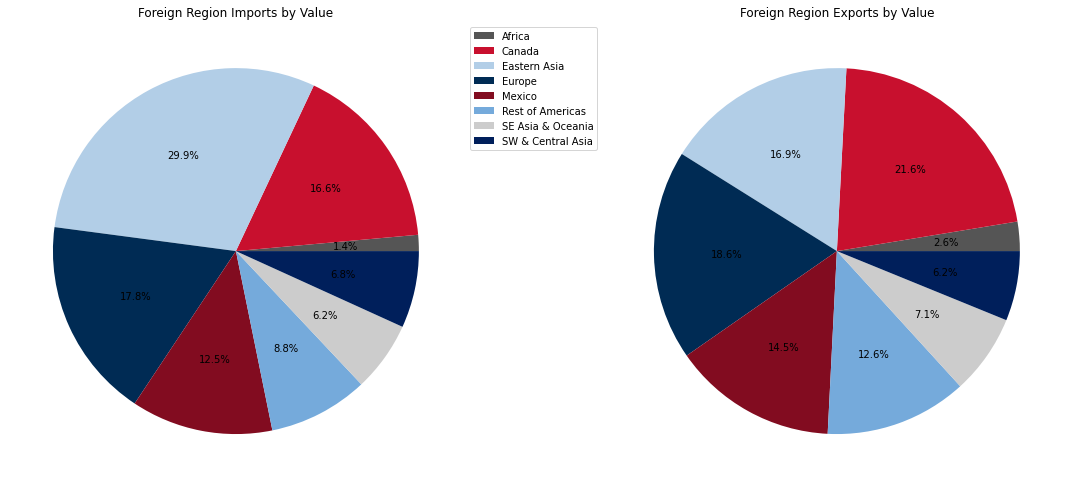

In [15]:
color = ['#555555', '#C8102E', '#B2CEE7', '#002B54', '#820C20', '#75AADB', '#CCCCCC', '#001F5B']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(top_foreign_import__value_regions, autopct='%1.1f%%', colors=color)
ax1.set_title('Foreign Region Imports by Value')
ax2.pie(top_foreign_export_value_regions, autopct='%1.1f%%', colors=color)
ax2.set_title('Foreign Region Exports by Value')
f.set_figheight(10)
f.set_figwidth(15)
ax1.legend(top_foreign_import__value_regions.index, bbox_to_anchor=(1,1))
plt.tight_layout()

<Figure size 1080x1080 with 0 Axes>

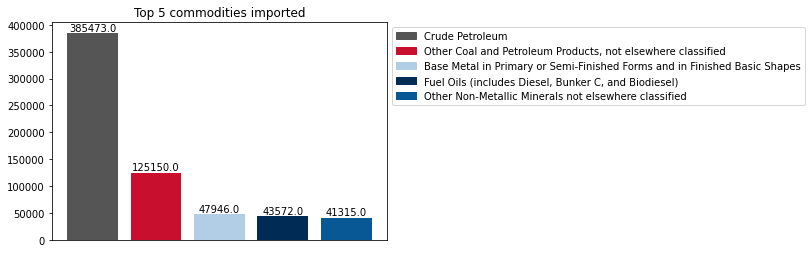

<Figure size 1080x1080 with 0 Axes>

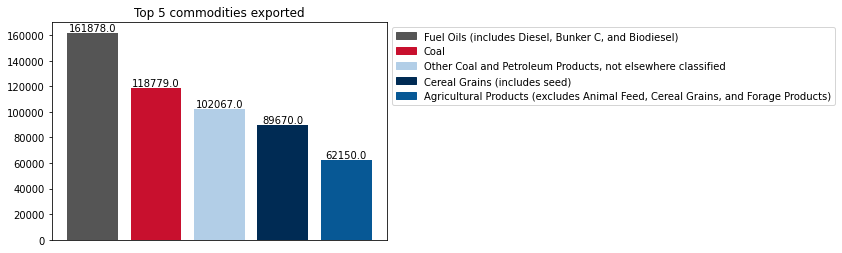

<Figure size 1080x1080 with 0 Axes>

In [16]:
color = ['#555555', '#C8102E', '#B2CEE7', '#002B54', '#075895']
fig, ax = plt.subplots()
bars = ax.bar(x=top_imported_commodities.index, height=top_imported_commodities,color=color)
for bar in bars:
    height = np.trunc(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height}', ha='center', va='bottom')
legend_handles = [plt.Rectangle((0,0),1,1, color=color[i], label=top_imported_commodities.index[i]) for i in range(len(top_imported_commodities))]
ax.legend(handles=legend_handles, bbox_to_anchor=(1,1))
plt.xticks([])
plt.title('Top 5 commodities imported')
plt.figure(figsize=(15,15))

fig, ax = plt.subplots()
bars = ax.bar(x=top_exported_commodities.index, height=top_exported_commodities,color=color)
for bar in bars:
    height = np.trunc(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height}', ha='center', va='bottom')
legend_handles = [plt.Rectangle((0,0),1,1, color=color[i], label=top_exported_commodities.index[i]) for i in range(len(top_imported_commodities))]
ax.legend(handles=legend_handles, bbox_to_anchor=(1,1))
plt.xticks([])
plt.title('Top 5 commodities exported')
plt.figure(figsize=(15,15))

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import missingno as msno
import os
import wget
import openpyxl
import math

gdf = gpd.read_file('cb_2018_us_state_500k.shp')
gdf['NAME'] = gdf.NAME.str.upper()
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,MISSISSIPPI,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,NORTH CAROLINA,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,OKLAHOMA,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,VIRGINIA,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,WEST VIRGINIA,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [18]:
gdf3 = gdf.merge(top_import_quantity_states.to_frame(),left_on='NAME',right_on='dms_orig')
gdf3

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,tons_2015
0,28,01779790,0400000US28,28,MS,MISSISSIPPI,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",13992.482979
1,37,01027616,0400000US37,37,NC,NORTH CAROLINA,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",4989.031781
2,40,01102857,0400000US40,40,OK,OKLAHOMA,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",4243.320000
3,51,01779803,0400000US51,51,VA,VIRGINIA,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",9797.963938
4,54,01779805,0400000US54,54,WV,WEST VIRGINIA,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",0.143000
5,22,01629543,0400000US22,22,LA,LOUISIANA,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",104950.464147
6,26,01779789,0400000US26,26,MI,MICHIGAN,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",55500.432636
7,25,00606926,0400000US25,25,MA,MASSACHUSETTS,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",13341.328242
8,16,01779783,0400000US16,16,ID,IDAHO,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",20204.905152
9,12,00294478,0400000US12,12,FL,FLORIDA,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",37176.851335


In [19]:
def makeColorColumn(gdf,variable,vmin,vmax):
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Blues)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return gdf

C:\Users\richa\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\richa\anaconda3\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\richa\anaconda3\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.c

<Axes: >

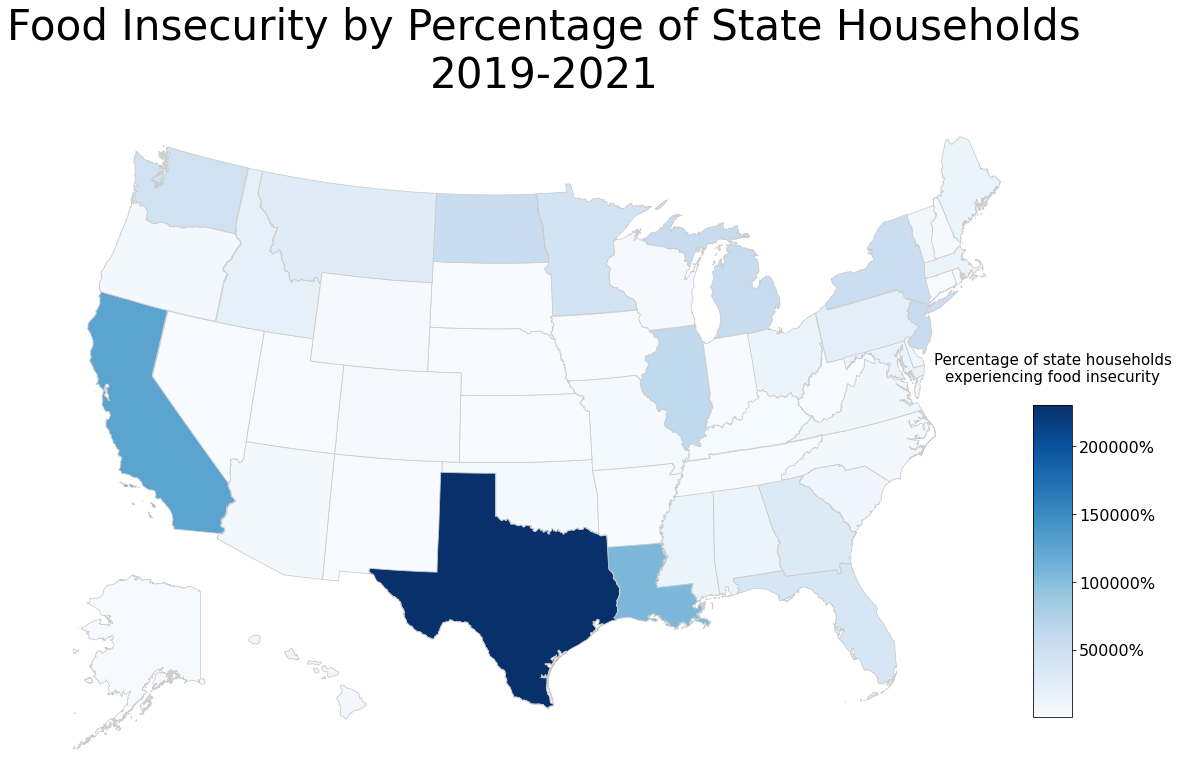

In [20]:
variable = 'tons_2015'

# make a column for value_determined_color in gdf
# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = gdf3.tons_2015.min(), gdf3.tons_2015.max() #math.ceil(gdf.pct_food_insecure.max())
# Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = "Blues"
gdf4 = makeColorColumn(gdf3,variable,vmin,vmax)

# create "visframe" as a re-projected gdf using EPSG 2163 for CONUS
visframe = gdf4.to_crs({'init':'epsg:2163'})


# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')


# add a title and annotation
ax.set_title('Food Insecurity by Percentage of State Households\n2019-2021', fontdict={'fontsize': '42', 'fontweight' : '1'})

# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Percentage of state households\nexperiencing food insecurity\n', fontdict={'fontsize': '15', 'fontweight' : '0'})

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x/100, '.0%'))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)


# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.NAME not in ['ALASKA','HAWAII']:
        vf = visframe[visframe.NAME==row.NAME]
        c = gdf4[gdf4.NAME==row.NAME][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')



# add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf4[gdf4.NAME=='ALASKA']
alaska_gdf.clip(polygon).plot(color=gdf4[gdf4.NAME=='ALASKA'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')


# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf4[gdf4.NAME=='HAWAII']
hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8')



In [ ]:
output_path = 'Charts'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['2012', '2013', '2014', '2015', '2020', '2025', '2030', '2035', '2040', '2045']

df_tons = df[['dms_orig', 'dms_dest', 'tons_2012', 'tons_2013','tons_2014', 'tons_2015', 'tons_2020', 'tons_2025', 'tons_2030', 'tons_2035', 'tons_2040', 'tons_2045']]

vmin, vmax = df_tons.min(numeric_only=True).min(), df_tons.max(numeric_only=True).max()

gdf_tons = gdf.merge(df_tons,left_on='NAME',right_on='dms_orig')
for year in list_of_years:
    
    variable = 'tons_'+year
    # Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
    colormap = "Blues"
    gdf2 = makeColorColumn(gdf_tons,variable,vmin,vmax)
    print('here')
    # create "visframe" as a re-projected gdf using EPSG 2163 for CONUS
    visframe = gdf2
    


    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(18, 14))
    # remove the axis box around the vis
    ax.axis('off')


#     # add a title and annotation
#     ax.set_title('Tons imported by State ', fontdict={'fontsize': '42', 'fontweight' : '1'})

    # Create colorbar legend
    fig = ax.get_figure()
    # add colorbar axes to the figure
    # This will take some iterating to get it where you want it [l,b,w,h] right
    # l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
    cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

#     cbax.set_title('Percentage of state households\nexperiencing food insecurity\n', fontdict={'fontsize': '15', 'fontweight' : '0'})

    # add color scale
    sm = plt.cm.ScalarMappable(cmap=colormap, \
                     norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # reformat tick labels on legend
    sm._A = []
    comma_fmt = FuncFormatter(lambda x, p: format(x/100, '.0%'))
    fig.colorbar(sm, cax=cbax, format=comma_fmt)
    tick_font_size = 16
    cbax.tick_params(labelsize=tick_font_size)


    # create map
    # Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
    for row in visframe.itertuples():
        if row.NAME not in ['ALASKA','HAWAII']:
            vf = visframe[visframe.NAME==row.NAME]
            c = gdf2[gdf2.NAME==row.NAME][0:1].value_determined_color.item()
            vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')



    # add Alaska
    akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
    akax.axis('off')
    # polygon to clip western islands
    polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
    alaska_gdf = gdf2[gdf2.NAME=='ALASKA']
    alaska_gdf.clip(polygon).plot(color=gdf2[gdf2.NAME=='ALASKA'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')


    # add Hawaii
    hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
    hiax.axis('off')
    # polygon to clip western islands
    hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
    hawaii_gdf = gdf2[gdf2.NAME=='HAWAII']
    hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8')
    
    plt.show()
    print(year)
#     fig = merged1.plot(column=year, cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
#     legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
#     # remove axis of chart
#     fig.axis('off')
    
#     # add a title
#     fig.set_title('Tons Imported by State', \
#               fontdict={'fontsize': '25',
#                          'fontweight' : '3'})
    
#     # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
#     filepath = os.path.join(output_path, year+'tons_import.jpg')
#     chart = fig.get_figure()
#     chart.savefig(filepath, dpi=300)

here


KeyboardInterrupt: 

In [ ]:
gdf